## Introduction

Access to clean and functional water sources is a fundamental necessity, yet many regions in Tanzania struggle to provide reliable water points for their population of over 67 million. Despite numerous water points being established across the country, a significant number are either non-functional or in need of repair. This situation hampers access to clean water, leading to health challenges, time lost in fetching water, and increased burdens on communities, particularly women and children.

This project seeks to address this issue by building a machine learning model to classify the operational status of water points. By analyzing data related to water point features such as pump type, installation details, and geographic characteristics, the project aims to predict whether a water point is functional, functional but requiring repair, or non-functional. Such insights can empower stakeholders to take targeted and proactive actions to improve water access.

## Problem Statement
In Tanzania, many water points fail to provide reliable access to clean water, impacting millions of people and burdening rural communities. As a data scientist, my goal is to develop a machine learning model to predict the operational status of water points—functional, in need of repair, or non-functional. This will enable stakeholders to prioritize maintenance, allocate resources effectively, and address systemic issues, ensuring sustainable access to clean water for the population.

## Objectives
### General Objectives
To create a predictive model that identifies the operational status of water points in Tanzania to enhance water access and support efficient resource allocation.

### Specific Objectives
> Predict Water Point Functionality: Develop a machine learning models to classify water points as functional, functional but in need of repair, or non-functional.

>Evaluate Model Performance: Assess the accuracy, precision, recall, and overall effectiveness of the models to ensure reliable predictions.

> Identify Failure Patterns: Analyze the data to uncover factors and trends contributing to water point failures.

> Optimize Resource Allocation: Provide actionable insights for stakeholders to prioritize maintenance and repair efforts effectively.

## Data Understanding and Loading
The dataset originates from Taarifa and the Tanzanian Ministry of Water and was downloaded from DrivenData https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/.  The following are set of information about the waterpoints:

amount_tsh - Total static head (amount water available to waterpoint)

date_recorded - The date the row was entered

funder - Who funded the well

gps_height - Altitude of the well

installer - Organization that installed the well

longitude - GPS coordinate

latitude - GPS coordinate

wpt_name - Name of the waterpoint if there is one

basin - Geographic water basin

subvillage - Geographic location

region - Geographic location

region_code - Geographic location (coded)

district_code - Geographic location (coded)

lga - Geographic location

ward - Geographic location

population - Population around the well

public_meeting - True/False

recorded_by - Group entering this row of data

scheme_management - Who operates the waterpoint

scheme_name - Who operates the waterpoint

permit - If the waterpoint is permitted

construction_year - Year the waterpoint was constructed

extraction_type - The kind of extraction the waterpoint uses

extraction_type_group - The kind of extraction the waterpoint uses

extraction_type_class - The kind of extraction the waterpoint uses

management - How the waterpoint is managed

management_group - How the waterpoint is managed

payment - What the water costs

payment_type - What the water costs

water_quality - The quality of the water

quality_group - The quality of the water

quantity - The quantity of water

quantity_group - The quantity of water

source - The source of the water

source_type - The source of the water

source_class - The source of the water

waterpoint_type - The kind of waterpoint

waterpoint_type_group - The kind of waterpoint

In [1]:
#Important Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
train_values = pd.read_csv("Train_values.csv")
train_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
train_labels = pd.read_csv("Train_labels.csv")
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
test_values = pd.read_csv("Test_values.csv")
test_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [5]:
train_df = train_values.merge(train_labels, on= 'id')
train_df.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,3/13/2011,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,10/1/2012,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,10/9/2012,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,11/3/2012,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,8/3/2011,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


id, wpt_name, recorded_by and num_private

In [6]:
train_df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [7]:
train_df.shape

(59400, 41)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [9]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


# Preprocessing


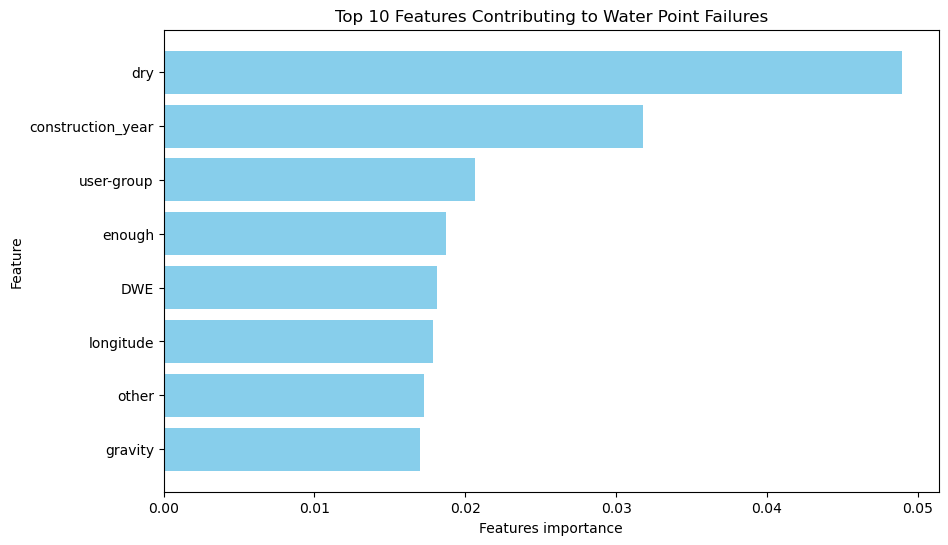

In [87]:
#### Feature Importance analysis
feature_importances = model_rfc.feature_importances_
feature_names = X_train_df.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 features
top_features = importance_df.head(10)
#print("Top 10 Features Contributing to Water Point Failures:")
#print(top_features)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Features importance')
plt.ylabel('Feature')
plt.title('Top 10 Features Contributing to Water Point Failures')
plt.gca().invert_yaxis()
plt.show()

Insights

dry:This appears to be the most influential feature in predicting water point failures. It could indicate whether the water source has dried up. Prioritize investigating and restoring water points marked as "dry."

construction_year: Older water points might be more prone to failure.Focus maintenance on older water points or consider replacement for very old installations.

user-group: This might reflect how the water point is managed or shared among users.Assess the impact of user-group dynamics on functionality and repair needs.

In [88]:
non_functional = train_df[train_df['status_group'] == 'non functional']
needs_repair = train_df[train_df['status_group'] == 'functional needs repair']

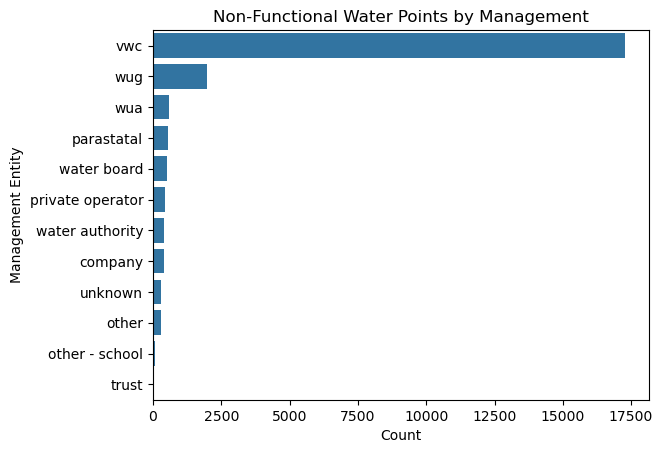

In [89]:
sns.countplot(data=non_functional, y='management', order=non_functional['management'].value_counts().index)
plt.title('Non-Functional Water Points by Management')
plt.xlabel('Count')
plt.ylabel('Management Entity')
plt.show()

Observations

VWC (Village Water Committees): This entity accounts for the majority of non-functional water points, indicating potential challenges in maintenance or resource allocation.Investigate the capacity, training, and resources available to VWC. Provide targeted training or support to improve their management effectiveness.

WUG (Water User Groups):The second-highest number of non-functional water points is managed by WUG.Evaluate their management processes and identify gaps that lead to failure.

#### Data cleaning

In [10]:
train_df_copied = train_df.copy()

In [11]:
train_df.duplicated().sum()

0

In [12]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(train_df['status_group'])


In [13]:
# Define Features (X) and Target (y)
X = train_df.drop(columns=['status_group', 'id'])  # Drop target and ID columns
y = y_encoded  # Target variable
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.duplicated().sum()

26

In [15]:
X_train = X_train[~X_train.duplicated()].reset_index(drop=True)
y_train = y_train[X_train.index.to_numpy()]  # Align y_train with the updated X_train indices

In [16]:
X_train.duplicated().sum()

0

In [17]:
X_test.duplicated().sum()

1

In [18]:
X_test = X_test[~X_test.duplicated()].reset_index(drop=True)
y_test = y_test[X_test.index.to_numpy()]  # Align y_test with the updated X_test indices

In [19]:
X_test.duplicated().sum()

0

## X_Train Data

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47494 entries, 0 to 47493
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             47494 non-null  float64
 1   date_recorded          47494 non-null  object 
 2   funder                 44617 non-null  object 
 3   gps_height             47494 non-null  int64  
 4   installer              44605 non-null  object 
 5   longitude              47494 non-null  float64
 6   latitude               47494 non-null  float64
 7   wpt_name               47493 non-null  object 
 8   num_private            47494 non-null  int64  
 9   basin                  47494 non-null  object 
 10  subvillage             47198 non-null  object 
 11  region                 47494 non-null  object 
 12  region_code            47494 non-null  int64  
 13  district_code          47494 non-null  int64  
 14  lga                    47494 non-null  object 
 15  wa

In [21]:
X_train.isna().sum()

amount_tsh                   0
date_recorded                0
funder                    2877
gps_height                   0
installer                 2889
longitude                    0
latitude                     0
wpt_name                     1
num_private                  0
basin                        0
subvillage                 296
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2675
recorded_by                  0
scheme_management         3103
scheme_name              23014
permit                    2439
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [22]:
#Checking the percentage of missing values in each column
missing_percentage = X_train.isnull().mean() * 100
missing_percentage[missing_percentage > 0]

funder                6.057607
installer             6.082874
wpt_name              0.002106
subvillage            0.623237
public_meeting        5.632290
scheme_management     6.533457
scheme_name          48.456647
permit                5.135386
dtype: float64

In [23]:
# dropping column Scheme_name , missing data is almost 50% 
X_train = X_train.drop(columns= ['scheme_name'])

In [24]:
#filling all non-numerical columns values having null values with mode
X_train[X_train.select_dtypes(include=[object]).columns] = X_train.select_dtypes(include=[object]).fillna(X_train.mode().iloc[0])

C:\Users\Hp\AppData\Local\Temp\ipykernel_10552\765570030.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train[X_train.select_dtypes(include=[object]).columns] = X_train.select_dtypes(include=[object]).fillna(X_train.mode().iloc[0])


In [25]:
X_train.duplicated().sum()

0

In [26]:
X_train.isna().sum().sum()

0

In [27]:
X_train.shape

(47494, 38)

In [28]:
X_train.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [29]:
# dropping columns which are not necessary in our model prediction
X_train = X_train.drop(columns= ['wpt_name', 'num_private','recorded_by', 'date_recorded', 'subvillage', 'lga' ,'ward'])

In [30]:
X_train.shape

(47494, 31)

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47494 entries, 0 to 47493
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             47494 non-null  float64
 1   funder                 47494 non-null  object 
 2   gps_height             47494 non-null  int64  
 3   installer              47494 non-null  object 
 4   longitude              47494 non-null  float64
 5   latitude               47494 non-null  float64
 6   basin                  47494 non-null  object 
 7   region                 47494 non-null  object 
 8   region_code            47494 non-null  int64  
 9   district_code          47494 non-null  int64  
 10  population             47494 non-null  int64  
 11  public_meeting         47494 non-null  bool   
 12  scheme_management      47494 non-null  object 
 13  permit                 47494 non-null  bool   
 14  construction_year      47494 non-null  int64  
 15  ex

In [32]:
X_train.select_dtypes(exclude=["int64", "float64"]).columns

Index(['funder', 'installer', 'basin', 'region', 'public_meeting',
       'scheme_management', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

#### Onehotencoding

In [33]:
X_train_categorical = X_train.select_dtypes(exclude=["int64", "float64"])
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

X_train_ohe = pd.DataFrame(
    ohe.fit_transform(X_train_categorical),
    #index is important to ensure we can concatenate with other columns
    index=X_train_categorical.index,
    # we are dummying multiple columns at once, so stack the names
    columns=np.hstack(ohe.categories_)
)
X_train_ohe

,0,A/co Germany,Aar,Abasia,Abc-ihushi Development Cent,Abd,Abdul,Abood,Abs,Aco/germany,...,dam,hand pump,improved spring,other,cattle trough,communal standpipe,dam,hand pump,improved spring,other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
47490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
47491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
47492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Normalization

In [34]:
X_train_numerical = X_train.select_dtypes(include=["int64", "float64"])
scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_numerical),
    # index is important to ensure we can concatenate with other columns
    index=X_train_numerical.index,
    columns=X_train_numerical.columns
)
X_train_scaled

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
0,0.000143,0.760678,0.878073,0.637112,0.204082,0.0125,0.005246,0.992548
1,0.000000,0.022238,0.880156,0.508598,0.000000,0.0750,0.000000,0.000000
2,0.000000,0.022238,0.805545,0.220458,0.112245,0.0750,0.000000,0.000000
3,0.000000,0.022238,0.844227,0.242006,0.112245,0.0875,0.000000,0.000000
4,0.000857,0.383339,0.917896,0.481453,0.040816,0.0125,0.003934,0.992052
...,...,...,...,...,...,...,...,...
47489,0.002857,0.137663,0.901399,0.246765,0.040816,0.0500,0.008361,0.991058
47490,0.002857,0.637487,0.855902,0.161367,0.102041,0.0625,0.001148,0.987581
47491,0.000000,0.017649,0.966024,0.534671,0.030612,0.0625,0.032787,0.996026
47492,0.000000,0.022238,0.850574,0.733278,0.163265,0.0750,0.000000,0.000000


### Concatenation

In [35]:
X_train_df = pd.concat([X_train_scaled, X_train_ohe], axis=1)
X_train_df

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,0,A/co Germany,...,dam,hand pump,improved spring,other,cattle trough,communal standpipe,dam,hand pump,improved spring,other
0,0.000143,0.760678,0.878073,0.637112,0.204082,0.0125,0.005246,0.992548,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.000000,0.022238,0.880156,0.508598,0.000000,0.0750,0.000000,0.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.022238,0.805545,0.220458,0.112245,0.0750,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.022238,0.844227,0.242006,0.112245,0.0875,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.000857,0.383339,0.917896,0.481453,0.040816,0.0125,0.003934,0.992052,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47489,0.002857,0.137663,0.901399,0.246765,0.040816,0.0500,0.008361,0.991058,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
47490,0.002857,0.637487,0.855902,0.161367,0.102041,0.0625,0.001148,0.987581,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
47491,0.000000,0.017649,0.966024,0.534671,0.030612,0.0625,0.032787,0.996026,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
47492,0.000000,0.022238,0.850574,0.733278,0.163265,0.0750,0.000000,0.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
X_train_df.duplicated().sum()

855

### LOGISTIC REGRESSION MODEL

In [37]:
y_train.shape

(47494,)

In [38]:
print(y_train.dtype)  # Should be numeric or categorical (e.g., int, float)
print(pd.Series(y_train).isnull().sum())  # Check for null values


int32
0


In [39]:
print(pd.Series(y_train).unique())


[0 2 1]


In [40]:
print(X_train_df.shape)  # Should be (47520, n_features)
print(y_train.shape)     # Should be (47520,)

(47494, 3799)
(47494,)


In [41]:
X_train_df.columns = X_train_df.columns.astype(str)

In [42]:
print(X_train_df.dtypes.value_counts())

float64    3799
Name: count, dtype: int64


In [43]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train_df, y_train)
model_log

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

## Model Evaluation

In [44]:
y_hat_train = logreg.predict(X_train_df)

train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    28097
2    16044
1     3353
Name: count, dtype: int64

Residuals (proportions)
0    0.591591
2    0.337811
1    0.070598
Name: proportion, dtype: float64


X_Test Data

In [45]:
# dropping columns which are not necessary in our model prediction or has missing values above 50%
X_test = X_test.drop(columns= ['wpt_name', 'num_private','recorded_by', 'date_recorded', 'subvillage', 'lga' ,'ward', 'scheme_name'])
#filling all non-numerical columns values having null values with mode
X_test[X_test.select_dtypes(include=[object]).columns] = X_test.select_dtypes(include=[object]).fillna(X_test.mode().iloc[0])
#onehotencoding for categorical columns
X_test_categorical = X_test.select_dtypes(exclude=["int64", "float64"])


X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_categorical),
    #index is important to ensure we can concatenate with other columns
    index=X_test_categorical.index,
    # we are dummying multiple columns at once, so stack the names
    columns=np.hstack(ohe.categories_)
)
#Normalization
X_test_numerical = X_test.select_dtypes(include=["int64", "float64"])
scaler = MinMaxScaler()

X_test_scaled = pd.DataFrame(
    scaler.fit_transform(X_test_numerical),
    # index is important to ensure we can concatenate with other columns
    index=X_test_numerical.index,
    columns=X_test_numerical.columns
)
#concatenation
X_test_df = pd.concat([X_test_scaled, X_test_ohe], axis=1)
X_test_df

C:\Users\Hp\AppData\Local\Temp\ipykernel_10552\1391562617.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test[X_test.select_dtypes(include=[object]).columns] = X_test.select_dtypes(include=[object]).fillna(X_test.mode().iloc[0])


,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,0,A/co Germany,...,dam,hand pump,improved spring,other,cattle trough,communal standpipe,dam,hand pump,improved spring,other
0,0.000000,0.033174,0.793240,0.688925,0.163265,0.0625,0.0000,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.033174,0.814249,0.572276,0.132653,0.0750,0.0000,0.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000072,0.650571,0.880105,0.633074,0.204082,0.0125,0.0148,0.997516,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.000000,0.033174,0.821888,0.216387,0.112245,0.0750,0.0000,0.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000362,0.441946,0.848579,0.616771,0.122449,0.0125,0.0235,0.999006,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11874,0.001449,0.687431,0.857796,0.153262,0.102041,0.0625,0.0530,0.994039,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11875,0.003623,0.715076,0.908797,0.718680,0.010204,0.0250,0.0150,0.988574,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11876,0.000000,0.033174,0.757487,0.784715,0.173469,0.3750,0.0000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11877,0.000000,0.269812,0.932341,0.475600,0.040816,0.0750,0.0001,0.995529,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [46]:
X_test_df.columns = X_test_df.columns.astype(str)

In [47]:
print(X_train_df.shape)  # Should be (n_samples_train, n_features)
print(X_test_df.shape)   # Should be (n_samples_test, n_features)


(47494, 3799)
(11879, 3799)


In [48]:
y_hat_test = logreg.predict(X_test_df)

test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    7214
2    3789
1     876
Name: count, dtype: int64

Residuals (proportions)
0    0.607290
2    0.318966
1    0.073744
Name: proportion, dtype: float64


### Evaluation Matrics

In [49]:
y_test.shape

(11879,)

In [50]:
y_hat_test.shape

(11879,)

In [51]:
# classification report 
from sklearn.metrics import classification_report

report = classification_report(y_true=y_test,y_pred=y_hat_test)

print(report)

              precision    recall  f1-score   support

           0       0.60      0.87      0.71      6456
           1       0.10      0.00      0.01       851
           2       0.63      0.35      0.45      4572

    accuracy                           0.61     11879
   macro avg       0.44      0.41      0.39     11879
weighted avg       0.58      0.61      0.56     11879



### SMOTE

In [52]:
y_train= pd.Series(y_train)

In [53]:
y_train.value_counts()

0    25783
2    18247
1     3464
Name: count, dtype: int64

Class distribution before SMOTE: Counter({0: 25783, 2: 18247, 1: 3464})


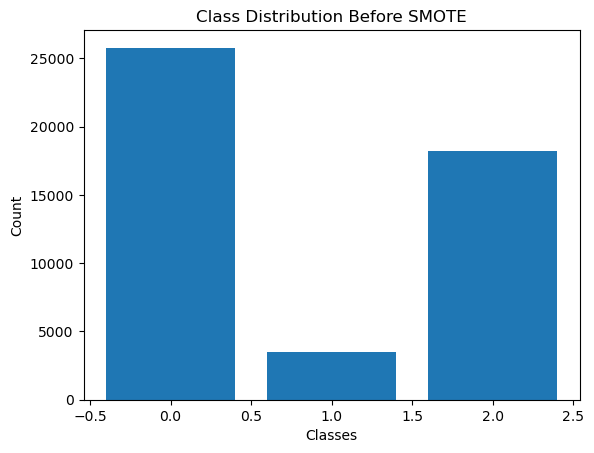

In [54]:
import matplotlib.pyplot as plt
from collections import Counter

# Assuming y_train is your target variable before SMOTE
# Calculate class distribution
class_distribution_before = Counter(y_train)

# Display the class distribution
print("Class distribution before SMOTE:", class_distribution_before)

# Visualize the class distribution
plt.bar(class_distribution_before.keys(), class_distribution_before.values())
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class Distribution Before SMOTE')
plt.show()


In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
y_train = pd.Series(y_train)

In [57]:
print("X_train_df type:", type(X_train_df))
print("y_train type:", type(y_train))
print("X_train_df shape:", X_train_df.shape)
print("y_train shape:", y_train.shape)

X_train_df type: <class 'pandas.core.frame.DataFrame'>
y_train type: <class 'pandas.core.series.Series'>
X_train_df shape: (47494, 3799)
y_train shape: (47494,)


In [58]:
print(y_train.unique())

[0 2 1]


In [59]:
y_train = y_train.astype(str)  # Convert to strings

In [60]:
print("X_train_df type:", type(X_train_df))
print("X_train_df shape:", X_train_df.shape)
print("y_train type:", type(y_train))
print("y_train shape:", y_train.shape)
print("y_train unique values:", y_train.unique())

X_train_df type: <class 'pandas.core.frame.DataFrame'>
X_train_df shape: (47494, 3799)
y_train type: <class 'pandas.core.series.Series'>
y_train shape: (47494,)
y_train unique values: ['0' '2' '1']


In [61]:
# Convert y_train to integers
y_train = y_train.astype(int)

In [62]:
y_train.name

In [63]:


# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train_df, y_train)




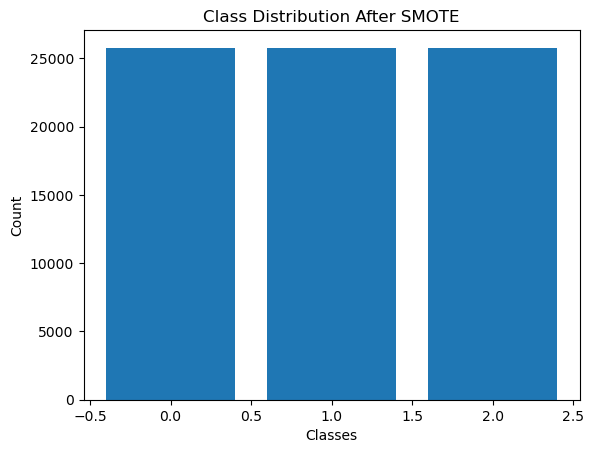

In [75]:
from collections import Counter
import matplotlib.pyplot as plt

class_distribution = Counter(y_train_smote)
plt.bar(class_distribution.keys(), class_distribution.values())
plt.title("Class Distribution After SMOTE")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [64]:
model = LogisticRegression(max_iter=500)

In [65]:
model_smote = model.fit(X_train_smote,y_train_smote)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
y_train_smote.value_counts()

0    25783
2    25783
1    25783
Name: count, dtype: int64

###  AUC

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the output (One-vs-Rest format)
classes = sorted(set(y_test))
y_test_bin = label_binarize(y_test, classes=classes)

# Get decision scores
y_score = model.decision_function(X_test_df)

# Calculate AUC for micro and macro averages
micro_auc = roc_auc_score(y_test_bin, y_score, average="micro")
macro_auc = roc_auc_score(y_test_bin, y_score, average="macro")

print(f"Micro-Averaged AUC: {micro_auc:.2f}")
print(f"Macro-Averaged AUC: {macro_auc:.2f}")


Micro-Averaged AUC: 0.64
Macro-Averaged AUC: 0.61


### Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model_rfc.fit(X_train_smote, y_train_smote)
predictions_rfc = model_rfc.predict(X_test_df)

In [69]:
report_rfc = classification_report(y_true=y_test,y_pred=predictions_rfc)
print(report_rfc)

              precision    recall  f1-score   support

           0       0.66      0.45      0.54      6456
           1       0.11      0.44      0.17       851
           2       0.57      0.49      0.52      4572

    accuracy                           0.46     11879
   macro avg       0.44      0.46      0.41     11879
weighted avg       0.58      0.46      0.51     11879



In [74]:
# Get predicted probabilities for the test set
probabilities_rfc = model_rfc.predict_proba(X_test_df)

# Binarize the target variable for AUC calculation
classes = sorted(set(y_test))
y_test_rfc = label_binarize(y_test, classes=classes)

# Calculate micro- and macro-averaged AUC
micro_auc = roc_auc_score(y_test_rfc, probabilities_rfc, average="micro", multi_class="ovr")
macro_auc = roc_auc_score(y_test_rfc, probabilities_rfc, average="macro", multi_class="ovr")

print(f"Micro-Averaged AUC (rfc): {micro_auc:.2f}")
print(f"Macro-Averaged AUC(rfc): {macro_auc:.2f}")


Micro-Averaged AUC (rfc): 0.66
Macro-Averaged AUC(rfc): 0.63


### Decision Trees

In [70]:
# Initialize the Decision Tree Classifier
model_dt = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)

# Fit the model
model_dt.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_train_dt = model_dt.predict(X_train_smote)
y_pred_test_dt = model_dt.predict(X_test_df)

In [71]:
# Evaluate the model
print("Train Accuracy:", accuracy_score(y_train_smote, y_pred_train_dt))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_dt))

Train Accuracy: 0.42668942067770754
Test Accuracy: 0.5693240171731627


In [72]:
report_dt = classification_report(y_true=y_test,y_pred=y_pred_test_dt)
print(report_dt)

              precision    recall  f1-score   support

           0       0.58      0.91      0.71      6456
           1       0.13      0.10      0.11       851
           2       0.72      0.18      0.28      4572

    accuracy                           0.57     11879
   macro avg       0.48      0.39      0.37     11879
weighted avg       0.60      0.57      0.50     11879



In [73]:
#Get predicted probabilities for each class
probabilities_dt = model_dt.predict_proba(X_test_df)

#Binarize the target variable
classes = sorted(set(y_test))  # Get unique classes
y_test_dt = label_binarize(y_test, classes=classes)

#Compute micro- and macro-averaged AUC
micro_auc = roc_auc_score(y_test_dt, probabilities_dt, average="micro", multi_class="ovr")
macro_auc = roc_auc_score(y_test_dt, probabilities_dt, average="macro", multi_class="ovr")

print(f"Micro-Averaged AUC: {micro_auc:.2f}")
print(f"Macro-Averaged AUC: {macro_auc:.2f}")

Micro-Averaged AUC: 0.71
Macro-Averaged AUC: 0.57


Insights

Logistic Regression:

Strengths:

Best accuracy (61%).

Balanced performance for Class 0 and Class 2.

Weakness:

Poor performance for Class 1 (F1-Score: 0.01).

Lower AUC scores compared to Random Forest.

Random Forest:

Strengths:

Best Macro-Averaged F1-Score (0.41).

Higher AUC scores (Micro: 0.66, Macro: 0.63) compared to Logistic Regression.

Decent performance across all classes, especially Class 1 (F1-Score: 0.17).

Weakness:

Low accuracy (46%).

Decision Tree:

Strengths:

Best Micro-Averaged AUC (0.71).

Strong recall for Class 0 (91%).

Weakness:

Poor performance for Class 2 (F1-Score: 0.28).

Struggles with minority Class 1 (F1-Score: 0.11).

##### conclusion.
Given the goal of prioritizing maintenance and resource allocation for non-functional or repair-needing water points, Random Forest is the best choice. It offers:

Better F1-Score for minority Class 1 (needs repair).

Higher overall AUC scores, indicating better classification confidence across classes.

#### Actionable Recommendations:

Focus on older water points and areas with dry sources.

Investigate user management practices (user-group) and funder performance (DWE).

Focus on Underperforming Managers:Prioritize support for VWC and WUG to reduce the number of non-functional water points.Conduct capacity-building workshops and allocate additional resources.